In [75]:
from sklearn.ensemble import AdaBoostClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
import time

In [76]:
data = pd.read_csv('C:/Users/Juan Carlos/Downloads/winequalityN.csv', sep=',', header=0)
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [77]:
# Formatting and adding a new column
print("Dataset:: ")
data['great_wine'] = np.where(data['quality']>=8,1,0)
data = data.drop('quality', axis='columns')

le_type = LabelEncoder()

data = data.dropna()
data['type'] = le_type.fit_transform(data['type'])

Label = preprocessing.LabelEncoder()

X = data.values[: , 0:11]
Y = data.values[: ,12]


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
start = time.time()
model = DecisionTreeClassifier(criterion='entropy', max_depth=5,random_state = 50, min_samples_leaf=1)
AdaBoost = AdaBoostClassifier(algorithm='SAMME', base_estimator=model, n_estimators=10, learning_rate=1)
boostModel = AdaBoost.fit(X_train, Y_train)
end = time.time()

Dataset:: 


In [78]:
y_pred = boostModel.predict(X_test)

predictions = metrics.accuracy_score(Y_test, y_pred)

print('The accuracy is: ', predictions*100, '%')
print("RunTime for 10 weak learners: ", end-start)

The accuracy is:  96.4414646725116 %
RunTime for 10 weak learners:  0.11099672317504883


In [79]:
start = time.time()
model = DecisionTreeClassifier(criterion='entropy', max_depth=5,random_state = 50, min_samples_leaf=1)
AdaBoost = AdaBoostClassifier(algorithm='SAMME', base_estimator=model, n_estimators=20, learning_rate=1)
boostModel = AdaBoost.fit(X_train, Y_train)
end = time.time()

y_pred = boostModel.predict(X_test)

predictions = metrics.accuracy_score(Y_test, y_pred)

print('The accuracy is: ', predictions*100, '%')
print("RunTime for 20 weak learners: ", end-start)

The accuracy is:  97.26663228468283 %
RunTime for 20 weak learners:  0.21301865577697754


In [80]:
start = time.time()
model = DecisionTreeClassifier(criterion='entropy', max_depth=5,random_state = 50, min_samples_leaf=1)
AdaBoost = AdaBoostClassifier(algorithm='SAMME', base_estimator=model, n_estimators=100, learning_rate=1)
boostModel = AdaBoost.fit(X_train, Y_train)
end = time.time()

y_pred = boostModel.predict(X_test)

predictions = metrics.accuracy_score(Y_test, y_pred)

print('The accuracy is: ', predictions*100, '%')
print("RunTime for 100 weak learners: ", end-start)

The accuracy is:  97.83393501805054 %
RunTime for 100 weak learners:  1.0670032501220703


In [72]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

model = Sequential()
model.add(Dense(16, input_dim=11, activation='relu')) 
model.add(Dropout(0.2))
model.add(Dense(1)) 
model.add(Activation('sigmoid'))  
model.compile(loss='binary_crossentropy',
              optimizer='adam',             #also try adam
              metrics=['accuracy'])

#model.compile(loss='mean_squared_error', optimizer='adam')
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 16)                192       
_________________________________________________________________
dropout_4 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
_________________________________________________________________
activation_4 (Activation)    (None, 1)                 0         
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________
None


Train on 4524 samples, validate on 1939 samples
Epoch 1/50
4524/4524 [==============================] - 0s 45us/step - loss: 2.5429 - accuracy: 0.8813 - val_loss: 1.1574 - val_accuracy: 0.9747
Epoch 2/50
4524/4524 [==============================] - 0s 17us/step - loss: 1.7601 - accuracy: 0.9335 - val_loss: 1.0280 - val_accuracy: 0.9747
Epoch 3/50
4524/4524 [==============================] - 0s 16us/step - loss: 1.5503 - accuracy: 0.9346 - val_loss: 0.8924 - val_accuracy: 0.9747
Epoch 4/50
4524/4524 [==============================] - 0s 15us/step - loss: 1.2957 - accuracy: 0.9361 - val_loss: 0.8572 - val_accuracy: 0.9747
Epoch 5/50
4524/4524 [==============================] - 0s 16us/step - loss: 1.2626 - accuracy: 0.9390 - val_loss: 0.7167 - val_accuracy: 0.9747
Epoch 6/50
4524/4524 [==============================] - 0s 15us/step - loss: 0.9705 - accuracy: 0.9341 - val_loss: 0.6033 - val_accuracy: 0.9747
Epoch 7/50
4524/4524 [==============================] - 0s 16us/step - loss: 0.840

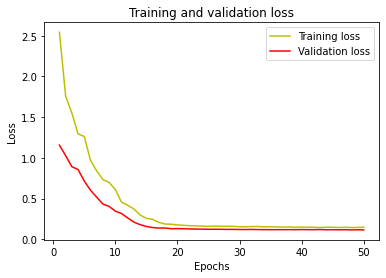

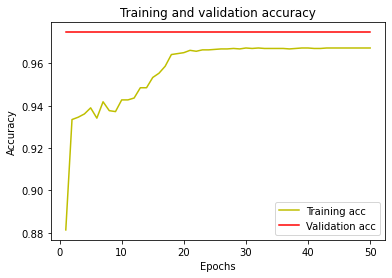

In [73]:
import matplotlib.pyplot as plt

history = model.fit(X_train, Y_train ,verbose=1, epochs=50, batch_size=64,
                    validation_data=(X_test, Y_test))

_, acc = model.evaluate(X_test, Y_test)
print("Accuracy = ", (acc * 100.0), "%")


#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()